In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

from sequence_addition.data import get_adding_problem_data
from sequence_addition.rnn import create_model
from sequence_addition.visualization import plot_loss_curves, significant_digits, plot_loss_vs_seq_length

sns.set(font_scale=1.25)
sns.set_style("whitegrid")

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

SEQ_LENGTHS = [50, 100, 150, 200]
NUM_SAMPLES = 15000
NUM_SAMPLES_TEST = 1000

In [3]:
results = []

for seq_length in SEQ_LENGTHS:
    print('#' * 80)
    print(f'\033[1mSequence length {seq_length}\033[0m with {NUM_SAMPLES} train/val samples '
          f'and {NUM_SAMPLES_TEST} test samples', flush=True)
    X, Y = get_adding_problem_data(seq_length=seq_length, num_samples=NUM_SAMPLES)

    model, history = create_model(X, Y)
    
    X_test, Y_test = get_adding_problem_data(seq_length=seq_length, num_samples=NUM_SAMPLES_TEST)
    test_loss = model.evaluate(X_test, Y_test, verbose=0)
    
    res = {
        'seq_length': seq_length,
        'model': model,
        'history': history,
        'test_loss': test_loss
    }
    results.append(res)
    sys.stderr.flush()
    print(f'Test loss={significant_digits(test_loss, n=3)}\n', flush=True)

################################################################################
Sequence length 50 with 15000 train/val samples and 1000 test samples


Create data: 100%|██████████| 1000/1000 [00:00<00:00, 1157.62it/s]


Test loss=0.000556

################################################################################
Sequence length 100 with 15000 train/val samples and 1000 test samples


Create data: 100%|██████████| 1000/1000 [00:00<00:00, 1146.53it/s]


Test loss=0.00159

################################################################################
Sequence length 150 with 15000 train/val samples and 1000 test samples


Create data: 100%|██████████| 1000/1000 [00:00<00:00, 1157.48it/s]


Test loss=0.00835

################################################################################
Sequence length 200 with 15000 train/val samples and 1000 test samples


Create data: 100%|██████████| 1000/1000 [00:00<00:00, 1135.35it/s]


Test loss=0.156



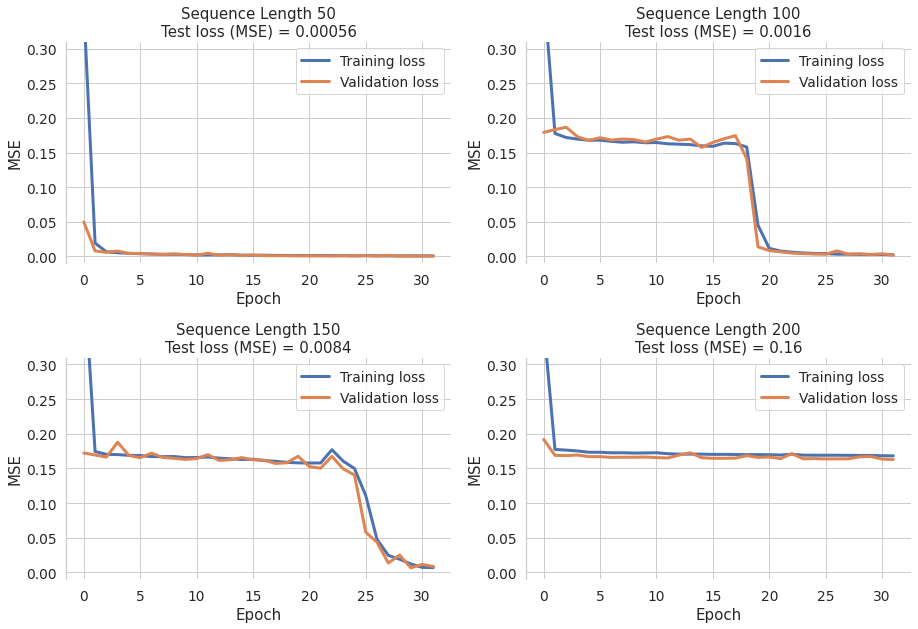

In [4]:
plt.figure(figsize=(13, 9))

for i, res in enumerate(results):
    ax = plt.subplot(2, 2, i + 1)

    plot_loss_curves(res, ax)

plt.tight_layout()
plt.show()

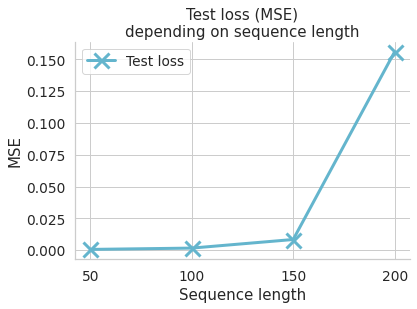

In [5]:
plt.figure(figsize=(6, 4))
plot_loss_vs_seq_length(results)
plt.show()